<a href="https://colab.research.google.com/github/etappau/info5731/blob/master/Paul_selfstudy7_bs24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [3]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [4]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [5]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

In [9]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive
"xxbos i really wanted to love this show . i truly , honestly did . \n \n xxmaj for the first time , gay viewers get their own version of the "" xxmaj the xxmaj bachelor "" . xxmaj with the help of his obligatory "" hag "" xxmaj xxunk , xxmaj james , a good looking , well - to - do thirty - something has the chance",negative
"xxbos \n \n i 'm sure things did n't exactly go the same way in the real life of xxmaj homer xxmaj hickam as they did in the film adaptation of his book , xxmaj rocket xxmaj boys , but the movie "" xxmaj october xxmaj sky "" ( an xxunk of the book 's title ) is good enough to stand alone . i have not read xxmaj",positive
"xxbos xxmaj to review this movie , i without any doubt would have to quote that memorable scene in xxmaj tarantino 's "" xxmaj pulp xxmaj fiction "" ( xxunk ) when xxmaj jules and xxmaj vincent are talking about xxmaj mia xxmaj wallace and what she does for a living . xxmaj jules tells xxmaj vincent that the "" xxmaj only thing she did worthwhile was pilot "" .",negative


In [10]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [11]:
data.train_ds[0][0]

Text xxbos xxmaj what i think i 'll probably like best about the new xxmaj star xxmaj wars film , " xxmaj phantom xxmaj menace " , is that it will likely blow " xxmaj titanic " out of the water , if you 'll pardon the pun , when it comes to sheer xxunk box office xxunk , and thereby knock it out of the number one spot . xxmaj every time i hear someone declare " xxmaj titanic " is the greatest film they 've ever seen , i think to myself , " xxmaj you do n't see a lot of movies , do you ? " xxmaj what a travesty . xxmaj you could make 50 good films that are a lot better than " xxmaj titanic " , and for the same price tag . 
 
  " xxmaj well , it won lots of academy awards , lots of people really loved it , " as someone might say in its defence . xxmaj well , lots of people like the xxmaj spice xxmaj girls and billions and billions of people eat at xxunk 's , but that does n't mean it 's high quality . xxmaj yes , millions of xxmaj elvis fans xxup can be wrong . 
 
  i 'll be the first to

In [12]:
data.train_ds[0][0].data[:10]

array([  2,   4,  62,  18, 118,  18, 245, 218,  51, 145])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [0]:
bs = 24

In [15]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/test')]

In [16]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat')]

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [18]:
!df -h

Filesystem      Size  Used Avail Use% Mounted on
overlay         359G   24G  317G   7% /
tmpfs           6.4G     0  6.4G   0% /dev
tmpfs           6.4G     0  6.4G   0% /sys/fs/cgroup
tmpfs           6.4G   12K  6.4G   1% /var/colab
/dev/sda1       365G   28G  338G   8% /opt/bin
shm             6.0G  4.0K  6.0G   1% /dev/shm
tmpfs           6.4G     0  6.4G   0% /sys/firmware


In [19]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: G

In [20]:
!cat /proc/meminfo

MemTotal:       13335276 kB
MemFree:          594072 kB
MemAvailable:   10276168 kB
Buffers:           94792 kB
Cached:          3422756 kB
SwapCached:            0 kB
Active:          3108632 kB
Inactive:        8948220 kB
Active(anon):    2458304 kB
Inactive(anon):     7536 kB
Active(file):     650328 kB
Inactive(file):  8940684 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               260 kB
Writeback:             0 kB
AnonPages:       8539244 kB
Mapped:           549308 kB
Shmem:              8072 kB
Slab:             465668 kB
SReclaimable:     417092 kB
SUnreclaim:        48576 kB
KernelStack:        3952 kB
PageTables:        23272 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667636 kB
Committed_AS:   10268888 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [22]:
data_lm.show_batch()

idx,text
0,"of the story could have been good , with a better effort to depict the inner feelings of a man who had to live with alcohol and violence since his youth . \n \n xxmaj sadly , the general idea seems to be more like "" i 'm the way i am because that 's the way i am "" . xxmaj and the laughingly bad attempt at giving"
1,"saw that xxmaj leatherface ( xxmaj gunnar xxmaj hansen ) was in it , i had to rent it . xxmaj it starts off pretty good , with the premise being that snuff films are being aired over cable . xxmaj however , the main character has nothing about her to make you feel sorry for her whatsoever , and the end of the movie really leaves you hanging ."
2,"as fine acting ? xxmaj anyone who has ever known a person with mental health problems will realise that xxmaj crowe 's performance is little short of caricature . xxmaj it is also rather offensive . xxmaj and , dare i say , just on the right side of being truly terrible xxbos xxmaj this sorry excuse for a film reminded me a great deal of what i heard about"
3,"they use on that , or was it a fluke ? ) and xxmaj dey xxmaj young is very appealing as xxmaj soles ' best , xxmaj kate xxmaj rambeau . xxmaj the weakest link , ironically enough , in this "" xxmaj high xxmaj school "" chain - gang is the xxmaj ramones . xxmaj they ca n't act , they 're not funny , and their concert segment"
4,"xxmaj he hides the fact that he is attending dancing classes from his colleagues and family . \n \n xxmaj there is a hilarious scene in the xxunk at the office when xxmaj sugiyama and xxmaj watanabe , a workmate who also dances , are interrupted practising some dance steps . xxmaj there are many other funny and warm - hearted scenes . \n \n xxmaj the ending"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


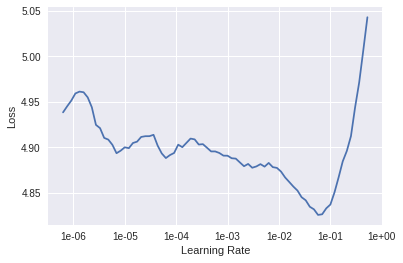

In [25]:
learn.recorder.plot(skip_end=15)

In [26]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.364606,4.194662,0.286960,1:52:42


In [0]:
learn.save('fit_head')

In [0]:
learn.load('fit_head');

In [0]:
learn.unfreeze()

In [29]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.294735,4.177738,0.288963,1:52:42


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [33]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because of the fact that the producers of these movies do n't think the points that make things funny is at the end . i 'm sure that he 's going to be the evil thing that 's going to make
I liked this movie because i was a huge fan of Lee Van Cleef , the editing , the film , and the acting . That 's what i have watched in this film . It 's a great film


In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
path = untar_data(URLs.IMDB)

In [0]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [38]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj perspective is a good thing . xxmaj since the release of "" xxmaj star xxmaj wars xxmaj episode i : xxmaj the xxmaj phantom xxmaj menace "" , claims and counter - claims of just how xxmaj episode 's xxup ii and xxup iii will eventuate has taken the spotlight off the ' original ' xxmaj star xxmaj wars films , making them part of a cohesive whole",pos
"xxbos "" xxmaj spielberg loves the smell of sentiment in the morning . xxmaj but sentiment at the expense of narrative honesty ? xxmaj nobody should love that . "" - xxmaj lucius xxmaj shepard \n \n "" xxmaj the xxmaj color xxmaj purple "" takes place in the xxmaj deep xxmaj south during the early 1900s , and tells the story of xxmaj celie and xxmaj nettie ,",neg
"xxbos xxmaj yesterday , i went to the monthly xxmaj antique xxmaj flea xxmaj market that comes to town . i really have no interest in such things , but i went for the fellowship of friends who do have such an interest . xxmaj looking over the hundreds of vendor , passing many of them quickly , i spotted someone selling xxup vhs tapes and dvds . xxmaj most",pos
"xxbos xxmaj shlock - merchant xxmaj leo xxmaj fulci takes a change of pace by making a trashy , barely coherent sword and sorcery fantasy movie instead of his usual trashy , barely coherent horror . \n \n a wimpy xxmaj orlando xxmaj bloom type called xxmaj ilias , from some society vaguely resembling xxmaj ancient xxmaj greece travels across the ocean to caveman territory on some vaguely defined",neg


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [40]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


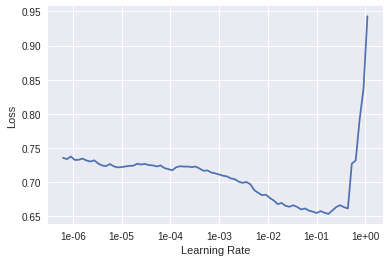

In [41]:
learn.recorder.plot()

In [42]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.483375,0.385929,0.832840,19:20


In [0]:
learn.save('first')

In [0]:
learn.load('first');

In [45]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.409129,0.272959,0.886320,22:56


In [0]:
learn.save('second')

In [0]:
learn.load('second');

In [48]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.315511,0.212643,0.916920,28:59


In [0]:
learn.save('third')

In [0]:
learn.load('third');

In [51]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.313258,0.203124,0.918760,38:14
1,0.282592,0.196770,0.922200,36:26


In [52]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([4.3425e-05, 9.9996e-01]))